In [283]:
import numpy as np
import pandas as pd
from pandas.core.computation.check import NUMEXPR_INSTALLED
from plotnine import *
import math
from tqdm import tqdm

In [16]:
len(np.zeros(10))

10

In [54]:
def Euler(s0,i0,r0,gamma,N,Tmax,beta): #euler method 
    s = np.zeros(Tmax) 
    i = np.zeros(Tmax)
    r = np.zeros(Tmax)
    s[0],i[0],r[0] = s0,i0,r0
    for n in range(Tmax-1):
        s[n+1] = s[n] + (-beta/N)*s[n]*i[n]
        i[n+1] = i[n] + (beta/N)*s[n]*i[n]-gamma*i[n]
        r[n+1] = r[n]+gamma*i[n]
    return s, i, r

In [55]:
N=134000 #test Euler function
Euler(i0=1, s0=N-1,r0=0, gamma=1, beta=2,N=134000,Tmax=100)

(array([133999.        , 133997.00001493, 133993.00013433, 133985.00079102,
        133969.00389521, 133937.01750421, 133873.07479061, 133745.31049688,
        133490.2675844 , 132982.12211229, 131973.55101939, 129986.91357783,
        126132.6319446 , 118876.65154676, 106002.52239176,  85634.01248092,
         59600.62095968,  36442.31796935,  23846.16511556,  19363.03167119,
         18067.40398657,  17718.02146726,  17625.62793028,  17601.3220481 ,
         17594.93673975,  17593.25988756,  17592.8195697 ,  17592.7039513 ,
         17592.6735925 ,  17592.66562096,  17592.66352782,  17592.66297821,
         17592.6628339 ,  17592.662796  ,  17592.66278605,  17592.66278344,
         17592.66278275,  17592.66278257,  17592.66278253,  17592.66278251,
         17592.66278251,  17592.66278251,  17592.66278251,  17592.66278251,
         17592.66278251,  17592.66278251,  17592.66278251,  17592.66278251,
         17592.66278251,  17592.66278251,  17592.66278251,  17592.66278251,
         175

In [62]:
#plot i vs. t...
#first adjust the Euler method for it to not have Tmax as parameter:
def Euler_iprogress(s0,i0,r0,gamma,N,beta):
    s,i,r=[0],[0],[0] 
    s[0],i[0],r[0] = s0,i0,r0
    t=0
    while (i[t] + (beta/N)*s[t]*i[t]-gamma*i[t])>=1:
        s=s+[0]
        i=i+[0]
        r=r+[0]
        s[t+1] = s[t] + (-beta/N)*s[t]*i[t]
        i[t+1] = i[t] + (beta/N)*s[t]*i[t]-gamma*i[t]
        r[t+1] = r[t]+gamma*i[t]
        t+=1
    return t+1, s, i, r

In [92]:
#insert parameter and time & lists of s, i, r are returned
time,s,i,r=Euler_iprogress(i0=1, s0=133999,r0=0, gamma=1, beta=2,N=134000)
print("i,the number of infected individuals, will drop below 1 starting from the {}th day.".format(time))

i,the number of infected individuals, will drop below 1 starting from the 26th day.


In [87]:
#create dataframe for plotting
data=pd.DataFrame()
data['time']=[i for i in range(time)]*3
data['counts']=s+i+r
data['attributes']=['s']*time+['i']*time+['r']*time

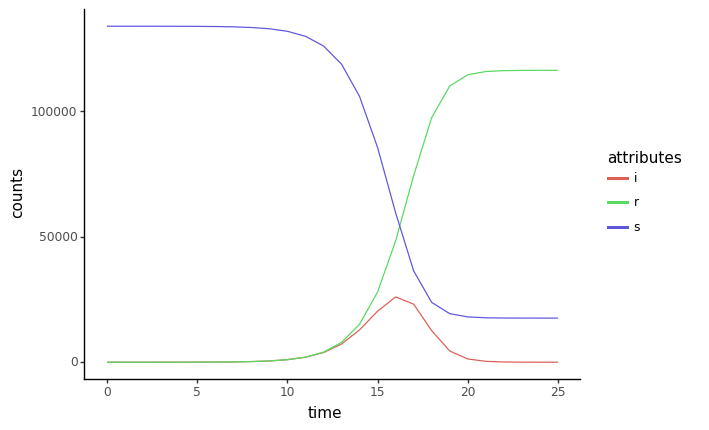

In [332]:
#plotting s,i,r vs. t
plot=(ggplot(data, aes(x='time', y='counts',color = 'attributes'))
 +geom_line()
 +theme_classic()
)
print(plot)

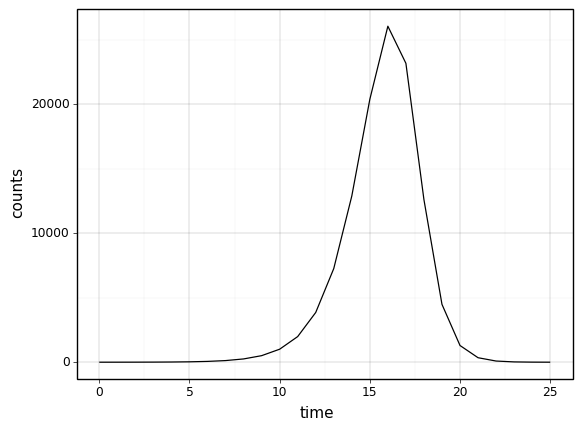

In [308]:
#plot i
plot_i=(ggplot(data[data['attributes']=='i'], aes(x='time', y='counts'))
 +geom_line()
 +theme_linedraw()
)
print(plot_i)

In [120]:
#find peak of i
peak_i=max(i)
table_at_peaki=data[(data['attributes']=='i')&(data['counts']==peak_i)]
peak_t=table_at_peaki['time'].values
print('The number of infected people peak on the {}th day, and {} people are infected at the peak'.format(peak_t,math.trunc(peak_i)))

The number of infected people peak on the [16]th day, and 26033 people are infected at the peak


In [197]:
#heatmaps for t and i with variation in beta and gamma

In [309]:
#setting varying ranges for beta and gamma
beta_list=[x/100 for x in range(50, 250, 5)] #tips:np.arange(0.5,2.5,0.05)
gamma_list=[x/100 for x in range(50, 250, 5)]

In [310]:
t_variation, i_variation=[],[] #list for resulting t and i for varying gamma and beta values 
for g in gamma_list:
    t_peak, i_peak=[],[]
    for b in beta_list:
        t, s, i, r=Euler_iprogress(i0=1, s0=133999,r0=0, gamma=g, beta=b,N=134000)
        t_list=[i for i in range(t)]
        index= i.index(max(i))
        t_peak.append(t_list[index])
        i_peak.append(max(i))
    t_variation.append(t_peak)
    i_variation.append(i_peak)

In [311]:
#create dataframe for t values with varying beta and gamma 
t_heatmapdata=pd.DataFrame([j for i in t_variation for j in i],columns=['time_peak'])

In [312]:
#add column of beta for plotting
t_heatmapdata['beta']=beta_list*len(gamma_list)

In [313]:
#add column of gamma for plotting
t_heatmapdata['gamma']=[j for i in [[a]*len(beta_list) for a in gamma_list] for j in i]

In [333]:
t_heatmapdata

,time_peak,beta,gamma
0,0,0.50,0.50
1,159,0.55,0.50
2,94,0.60,0.50
3,69,0.65,0.50
4,56,0.70,0.50
...,...,...,...
1595,0,2.25,2.45
1596,0,2.30,2.45
1597,0,2.35,2.45
1598,0,2.40,2.45


In [330]:
#creating heatmap for t values for 
t_heatmap=ggplot(t_heatmapdata,aes(x='beta',y='gamma',fill='time_peak'))
t_heatmap+=geom_tile(aes(fill = t_heatmapdata['time_peak']))
t_heatmap += theme(axis_text_x = element_text(size = 10),
                 axis_text_y = element_text(size = 10),
                 panel_background = element_rect(fill="white"),
                 panel_grid_major = element_line(colour = "white"),
                 strip_background = element_rect(colour = "white", fill="orange"))
# t_heatmap+= geom_text(aes(label = round(t_heatmapdata['time_peak'], 1)))
t_heatmap+= scale_fill_gradient(low = "yellow", high = "pink") 

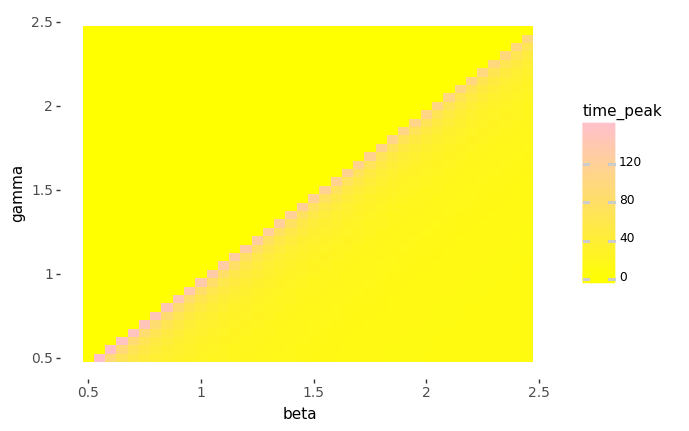

<ggplot: (8784786563000)>

In [331]:
t_heatmap 

In [318]:
#iheatmap

In [319]:
#create dataframe for i values with varying beta and gamma 
i_heatmapdata=pd.DataFrame([j for i in i_variation for j in i],columns=['i_peak'])

In [320]:
#add column of beta for plotting
i_heatmapdata['beta']=beta_list*len(gamma_list)

In [321]:
#add column of gamma for plotting
i_heatmapdata['gamma']=[j for i in [[a]*len(beta_list) for a in gamma_list] for j in i]

In [325]:
i_heatmapdata

,i_peak,beta,gamma
0,1.000000,0.50,0.50
1,581.401567,0.55,0.50
2,2035.776185,0.60,0.50
3,4054.954397,0.65,0.50
4,6430.537278,0.70,0.50
...,...,...,...
1595,1.000000,2.25,2.45
1596,1.000000,2.30,2.45
1597,1.000000,2.35,2.45
1598,1.000000,2.40,2.45


In [322]:
#creating heatmap for t values for 
i_heatmap=ggplot(i_heatmapdata,aes(x='beta',y='gamma',fill='i_peak'))
i_heatmap+=geom_tile(aes(fill = i_heatmapdata['i_peak']))
i_heatmap += theme(axis_text_x = element_text(size = 10),
                 axis_text_y = element_text(size = 10),
                 panel_background = element_rect(fill="white"),
                 panel_grid_major = element_line(colour = "white"),
                 strip_background = element_rect(colour = "white", fill="orange"))
# i_heatmap+= geom_text(aes(label = round(i_heatmapdata['i_peak'], 1)))
i_heatmap+= scale_fill_gradient(low = "yellow", high = "blue") 

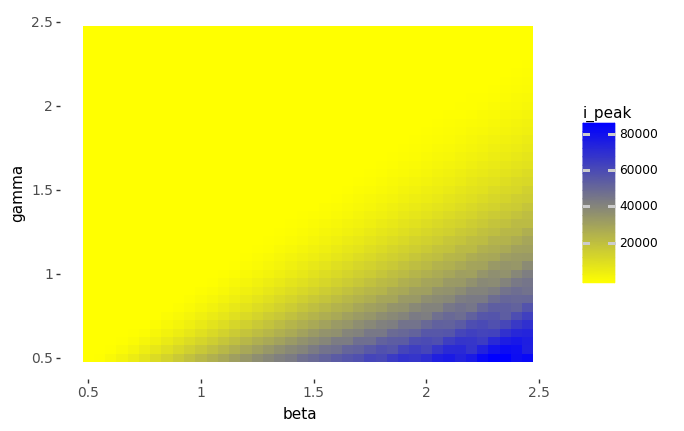

<ggplot: (8784787863778)>

In [323]:
i_heatmap 